# Tarefa-01. MO431
## Patrick de Carvalho Tavares Rezende Ferreira - 175480

Repositório no GitHub: https://github.com/patrickctrf/MO431-Fundamentos-de-Algebra-Linear-e-Otimizacao-para-Aprendizado-de-Maquina

In [46]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.decomposition import TruncatedSVD

%matplotlib inline

Primeiramente, importamos a matriz com os conteúdos originais.

In [47]:
# A matriz X precisa estar no mesmo diretório do código sendo executado para ser importada.
X = np.load("X.npy")

Exibindo a primeira imagem antes da decomposição em SVD.

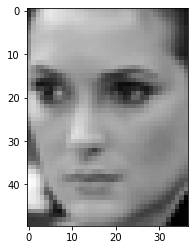

In [48]:
plt.imshow(X[0].reshape(50, 37), cmap=cm.gray)
plt.show()

Com o modo "full_matrices" == True, fazemos a fatoração SVD que chamamos de "full matrix", que resulta em matrizes U(mxm), D(mxn) e V^-1(nxn). Como a API do numpy retorna apenas os elementos da diagonal principal da matriz D, fazemos abaixo o preenchimento desta matriz e imprimimos o formato resultante de cada uma.

In [49]:
U, D, Vh = np.linalg.svd(X, full_matrices=True)

# Para comportar a matriz recuperada "D", precisa ser multiplicavel pelo numero
# de colunas de U e numero de linhas de Vh.
matrix_auxiliar = np.zeros((U.shape[1], Vh.shape[0]))

# Substituimos a diagonal principal pelos devido elementos do vetor D para
# retomar a matriz D esparsa.
for i in range(min(matrix_auxiliar.shape)):
    matrix_auxiliar[i][i] = D[i]

# Retomamaos a matriz D.
D = matrix_auxiliar

print("\nFormatos das matrizes SVD padrão")
print("Matriz U: ", str(U.shape))
print("Matriz D: ", str(D.shape))
print("Matriz V^-1: ", str(Vh.shape))


Formatos das matrizes SVD padrão
Matriz U:  (3023, 3023)
Matriz D:  (3023, 1850)
Matriz V^-1:  (1850, 1850)


Precisamos verificar o erro da reconstrução após a decomposição em SVD. Calculamos e exibimos abaixo o erro máximo e médio da representação em SVD "full matrices".

In [50]:
# Calculamos a diferenca entre cada elemento da matriz original e da matriz
# reconstruida a partir do SVD compacto.
matriz_de_diferencas = X - np.matmul(np.matmul(U, D), Vh)

print("\nMáximo Erro SVD Padrão: " + str(np.absolute(matriz_de_diferencas).max()))
print("Erro Médio SVD Padrão: " + str(np.absolute(matriz_de_diferencas).mean()))
print("Razão entre Máximo Erro e Erro Médio SVD Padrão: " + str(np.absolute(matriz_de_diferencas).max() / np.absolute(matriz_de_diferencas).mean()))



Máximo Erro SVD Padrão: 2.7038279569069346e-05
Erro Médio SVD Padrão: 6.174903342868209e-06
Razão entre Máximo Erro e Erro Médio SVD Padrão: 4.37873729639794


Abaixo computamos a matriz reduzida a partir do SVD full matrices (Uk*Dk), onde Uk é uma matriz com apenas as 100 primeiras colunas de U e Dk é uma matriz com apenas as 100 primeiras linhas e 100 primeiras colunas de D.

In [51]:
k = 100
matriz_reduzida_full_matrices = np.matmul(U[:, :k], D[:k, :k])

print("\nFormato da matriz reduzida SVD full matrices: " + str(matriz_reduzida_full_matrices.shape))



Formato da matriz reduzida SVD full matrices: (3023, 100)


E, multiplicando a matriz reduzida pela matriz Vk^-1 (apenas as 100 primeiras linhas de V^-1), reconstruímos a matrix original com perdas (linhas e colunas das matrizes SVD originais foram removidas).

In [52]:
matriz_reconstruida_full_matrices = np.matmul(matriz_reduzida_full_matrices, Vh[:k, :])

print("\nFormato da matriz reconstruida SVD full matrices: " + str(matriz_reconstruida_full_matrices.shape))


Formato da matriz reconstruida SVD full matrices: (3023, 1850)


Nota-se que o erro de representação é pequeno, sendo, em média dos valores absolutos, da ordem de de 10^-6. O valor máximo da diferença, em absoluto, é de 2.703829574102201e-05.

Com o modo "full_matrices" == False, fazemos a fatoração SVD que chamamos de compacta, que resulta em matrizes U(mxn), D(nxn) e V^-1(nxn). Como a API do numpy retorna apenas os elementos da diagonal principal da matriz D, fazemos abaixo o preenchimento desta matriz e imprimimos o formato resultante de cada uma.

In [53]:
U, D, Vh = np.linalg.svd(X, full_matrices=False)

# Para comportar a matriz recuperada "D", precisa ser multiplicavel pelo numero
# de colunas de U e numero de linhas de Vh.
matrix_auxiliar = np.zeros((U.shape[1], Vh.shape[0]))

# Substituimos a diagonal principal pelos devido elementos do vetor D para
# retomar a matriz D esparsa.
for i in range(min(matrix_auxiliar.shape)):
    matrix_auxiliar[i][i] = D[i]

# Retomamaos a matriz D.
D = matrix_auxiliar

print("\nFormatos das matrizes SVD Compacto")
print("Matriz U: ", str(U.shape))
print("Matriz D: ", str(D.shape))
print("Matriz V^-1: ", str(Vh.shape))


Formatos das matrizes SVD Compacto
Matriz U:  (3023, 1850)
Matriz D:  (1850, 1850)
Matriz V^-1:  (1850, 1850)


Precisamos verificar o erro da reconstrução após a decomposição em SVD. Calculamos e exibimos abaixo o erro máximo e médio da representação em SVD compacta.

In [54]:
# Calculamos a diferenca entre cada elemento da matriz original e da matriz
# reconstruida a partir do SVD compacto.
matriz_de_diferencas = X - np.matmul(np.matmul(U, D), Vh)

print("\nMáximo Erro SVD Compacto: " + str(np.absolute(matriz_de_diferencas).max()))
print("Erro Médio SVD Compacto: " + str(np.absolute(matriz_de_diferencas).mean()))
print("Razão entre Máximo Erro e Erro Médio SVD Compacto: " + str(np.absolute(matriz_de_diferencas).max() / np.absolute(matriz_de_diferencas).mean()))



Máximo Erro SVD Compacto: 2.7038279569069346e-05
Erro Médio SVD Compacto: 6.174903342868209e-06
Razão entre Máximo Erro e Erro Médio SVD Compacto: 4.37873729639794


Nota-se que o erro de representação é pequeno, sendo, em média dos valores absolutos, da ordem de de 10^-6 (sempre em comparação com. O valor máximo da diferença, em absoluto, é de 2.703829574102201e-05.

Nota-se que o erro de representação do SVD convencional e do SVD compacto é praticamente o mesmo, havendo diferença na décima casa decimal quando se compara suas respectivas razões de seus erros máximo e médio (Razão entre Máximo Erro e Erro Médio).

A Razão entre Máximo Erro e Erro Médio de ambas as representações foi de aproximadamente 4,38 vezes. Considerando que o erro máximo é pequeno (da ordem de 10^-5), isto significa que os demais erros de cada elemento foram ainda menores e que a representação em SVD nas duas formulações rendeu reconstruções para valores próximos aos originais.

Abaixo computamos a matriz reduzida a partir do svd compacto (Uk*Dk), onde Uk é uma matriz com apenas as 100 primeiras colunas de U e Dk é uma matriz com apenas as 100 primeiras linhas e 100 primeiras colunas de D.

In [55]:
k = 100
matriz_reduzida_svd_compacto = np.matmul(U[:, :k], D[:k, :k])

print("\nFormato da matriz reduzida a partir do SVD compacto: " + str(matriz_reduzida_svd_compacto.shape))


Formato da matriz reduzida a partir do SVD compacto: (3023, 100)


E, multiplicando a matriz reduzida pela matriz Vk^-1 (apenas as 100 primeiras linhas de V^-1), reconstruímos a matrix original com perdas (linhas e colunas das matrizes SVD originais foram removidas).

In [56]:
matriz_reconstruida_svd_compacto = np.matmul(matriz_reduzida_svd_compacto, Vh[:k, :])

print("\nFormato da matriz reconstruida a partir do SVD compacto: " + str(matriz_reconstruida_svd_compacto.shape))



Formato da matriz reconstruida a partir do SVD compacto: (3023, 1850)


A primeira imagem da matriz reconstruída a partir do SVD com matriz reduzida é exibida abaixo e é bastante similar à primeira imagem da matriz original. Entretanto, nota-se claramente certa perda de qualidade.

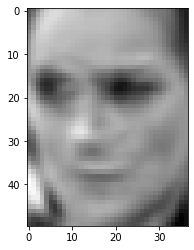

In [57]:
plt.imshow(matriz_reconstruida_full_matrices[0].reshape(50, 37), cmap=cm.gray)
plt.show()

Abaixo fazemos a comparação de qual método SVD (full matrices ou compacto) utilizar para obter um melhor resultado no momento da reconstrução da matriz original, embora ambas as imagens reconstruídas tenham ficado bem semelhantes. Nota-se que os erros obtidos durante a reconstrução foram baixos, tal que sequer foram notados nos cálculos exibindo até 14 casas decimais.

In [58]:
# Calculamos a diferenca entre cada elemento da matriz original e da matriz
# reconstruida a partir de cada SVD
matriz_de_diferencas_svd_full_matrices = X - matriz_reconstruida_full_matrices
matriz_de_diferencas_svd_compacto = X - matriz_reconstruida_svd_compacto

print("\nMáximo Erro SVD Compacto: " + str(np.absolute(matriz_de_diferencas_svd_full_matrices).max()))
print("Erro Médio SVD Compacto: " + str(np.absolute(matriz_de_diferencas_svd_full_matrices).mean()))

print("\nMáximo Erro SVD Compacto: " + str(np.absolute(matriz_de_diferencas_svd_compacto).max()))
print("Erro Médio SVD Compacto: " + str(np.absolute(matriz_de_diferencas_svd_compacto).mean()))


Máximo Erro SVD Compacto: 136.08741228750995
Erro Médio SVD Compacto: 8.148400493978869

Máximo Erro SVD Compacto: 136.08741228750995
Erro Médio SVD Compacto: 8.148400493978869


Abaixo realizamos a decomposição em SVD através da API TruncatedSVD do sklearn com 100 componentes. Fazemos a reconstrução e exibimos as dimensões da matriz reduzida e de V^-1. 

In [59]:
# Inicia/Gera o modelo do SVD, mas so faz calculo dps do "fit"
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)

# Podemos obter a matriz reduzida (U*D).
matriz_reduzida_UD = svd.fit_transform(X)
# Tambem desnecessario, so pra obter a matriz V^-1
Vh = svd.components_

# Gera REALMENTE as matrizes do SVD (nem tinhamos passado a matriz original ate
# aqui).
svd.fit(X)

# Recupera a matrix original apos ter convertido para o SVD.
matriz_reconstruida_sklearn = svd.inverse_transform(matriz_reduzida_UD)

print("\nFormatos das matrizes TruncatedSVD")
print("Matriz reduzida (UD): ", str(matriz_reduzida_UD.shape))
print("Matriz V^-1: ", str(Vh.shape))


Formatos das matrizes TruncatedSVD
Matriz reduzida (UD):  (3023, 100)
Matriz V^-1:  (100, 1850)


Calculamos abaixo o erro na representação a partir do TruncatedSVD. O erro é consideravelmente maior que nos casos sem perda, como era de se esperar, havendo erro máximo de 137 para o pixel mais afetado, mas ainda assim o erro médio é de 8,15, 16 vezes menor.

In [60]:
# Calculamos a diferenca entre cada elemento da matriz original e da matriz
# reconstruida a partir do TruncatedSVD do sklearn.
matriz_de_diferencas = X - matriz_reconstruida_sklearn

print("\nMáximo Erro TruncatedSVD do sklearn: " + str(np.absolute(matriz_de_diferencas).max()))
print("Erro Médio TruncatedSVD do sklearn: " + str(np.absolute(matriz_de_diferencas).mean()))
print("Razão entre Máximo Erro e Erro Médio TruncatedSVD do sklearn: " + str(np.absolute(matriz_de_diferencas).max() / np.absolute(matriz_de_diferencas).mean()))



Máximo Erro TruncatedSVD do sklearn: 137.51453
Erro Médio TruncatedSVD do sklearn: 8.152535
Razão entre Máximo Erro e Erro Médio TruncatedSVD do sklearn: 16.8677


Abaixo fazemos a impressão da primeira imagem da matriz reconstruída. Nota-se que ela manteve a similaridade, mas possui certa perda de informação, como era de se esperar.

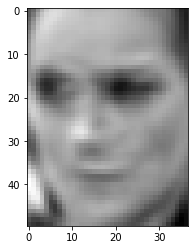

In [61]:
plt.imshow(matriz_reconstruida_sklearn[0].reshape(50, 37), cmap=cm.gray)
plt.show()